In [37]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [39]:
age = pd.read_csv('/content/drive/MyDrive/VDay/gifts_age.csv')

In [40]:
age.head()

,Age,SpendingCelebrating,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
0,18-24,51,70,50,33,33,41,33,23
1,25-34,40,62,44,34,33,37,27,19
2,35-44,31,58,41,29,42,30,26,22
3,45-54,19,60,37,20,42,31,20,23
4,55-64,18,50,32,13,43,29,19,20


In [41]:
gender = pd.read_csv('/content/drive/MyDrive/VDay/gifts_gender.csv')
gender.head()

,Gender,SpendingCelebrating,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
0,Men,27,52,56,30,37,33,20,18
1,Women,27,59,19,14,43,29,24,24


In [42]:
hist_spend = pd.read_csv('/content/drive/MyDrive/VDay/historical_spending.csv')
hist_spend.head()

,Year,PercentCelebrating,PerPerson,Candy,Flowers,Jewelry,GreetingCards,EveningOut,Clothing,GiftCards
0,2010,60,103.00,8.60,12.33,21.52,5.91,23.76,10.93,8.42
1,2011,58,116.21,10.75,12.62,26.18,8.09,24.86,12.00,11.21
2,2012,59,126.03,10.85,13.49,29.60,6.93,25.66,10.42,8.43
3,2013,60,130.97,11.64,13.48,30.94,8.32,27.93,11.46,10.23
4,2014,54,133.91,10.80,15.00,30.58,7.97,27.48,13.37,9.00


In [43]:
print(f'Gifts by age : ', age.shape)
print(f'Gifts by gender : ', gender.shape)
print(f'Historical spending : ', hist_spend.shape)

Gifts by age :  (6, 9)
Gifts by gender :  (2, 9)
Historical spending :  (13, 10)


In [44]:
print(age.info())
print(gender.info())
print(hist_spend.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  6 non-null      object
 1   SpendingCelebrating  6 non-null      int64 
 2   Candy                6 non-null      int64 
 3   Flowers              6 non-null      int64 
 4   Jewelry              6 non-null      int64 
 5   GreetingCards        6 non-null      int64 
 6   EveningOut           6 non-null      int64 
 7   Clothing             6 non-null      int64 
 8   GiftCards            6 non-null      int64 
dtypes: int64(8), object(1)
memory usage: 560.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               2 non-null      object
 1   SpendingCelebrating  2 non-null      int64 
 2   

In [45]:
age.isnull().sum()

Age                    0
SpendingCelebrating    0
Candy                  0
Flowers                0
Jewelry                0
GreetingCards          0
EveningOut             0
Clothing               0
GiftCards              0
dtype: int64

In [46]:
gender.isnull().sum()

Gender                 0
SpendingCelebrating    0
Candy                  0
Flowers                0
Jewelry                0
GreetingCards          0
EveningOut             0
Clothing               0
GiftCards              0
dtype: int64

In [47]:
hist_spend.isnull().sum()

Year                  0
PercentCelebrating    0
PerPerson             0
Candy                 0
Flowers               0
Jewelry               0
GreetingCards         0
EveningOut            0
Clothing              0
GiftCards             0
dtype: int64

In [48]:
print(age.nunique())
print(gender.nunique())
print(hist_spend.nunique())

Age                    6
SpendingCelebrating    6
Candy                  6
Flowers                6
Jewelry                6
GreetingCards          4
EveningOut             6
Clothing               6
GiftCards              4
dtype: int64
Gender                 2
SpendingCelebrating    1
Candy                  2
Flowers                2
Jewelry                2
GreetingCards          2
EveningOut             2
Clothing               2
GiftCards              2
dtype: int64
Year                  13
PercentCelebrating     8
PerPerson             13
Candy                 13
Flowers               13
Jewelry               13
GreetingCards         13
EveningOut            13
Clothing              13
GiftCards             12
dtype: int64


In [49]:
# Reshape the 'Age' column to a row
reshaped_age = age.set_index('Age').T.reset_index()

# Reshape 'Age' column as the header
reshaped_age.columns.name = None

reshaped_age = reshaped_age.rename(columns={'index': 'Features'})

# Add a new column by summing the rows
reshaped_age['age_total'] = reshaped_age.sum(axis=1)

# Show the result
reshaped_age.head(10)


<ipython-input-49-0d08cb3f5ac6>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  reshaped_age['age_total'] = reshaped_age.sum(axis=1)


,Features,18-24,25-34,35-44,45-54,55-64,65+,age_total
0,SpendingCelebrating,51,40,31,19,18,13,172
1,Candy,70,62,58,60,50,42,342
2,Flowers,50,44,41,37,32,25,229
3,Jewelry,33,34,29,20,13,8,137
4,GreetingCards,33,33,42,42,43,44,237
5,EveningOut,41,37,30,31,29,24,192
6,Clothing,33,27,26,20,19,12,137
7,GiftCards,23,19,22,23,20,20,127


In [50]:
# Reshape 'Gender' column as the index
reshaped_gender = gender.set_index('Gender').T.reset_index()

# Reshape 'Gender' column as the header
reshaped_gender.columns.name = None

reshaped_gender = reshaped_gender.rename(columns={'index': 'Features'})

# Add a new column and sum the rows
reshaped_gender['gender_total'] = reshaped_gender.sum(axis=1)

# Display the result
reshaped_gender.head(10)


<ipython-input-50-28ccb5149c26>:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  reshaped_gender['gender_total'] = reshaped_gender.sum(axis=1)


,Features,Men,Women,gender_total
0,SpendingCelebrating,27,27,54
1,Candy,52,59,111
2,Flowers,56,19,75
3,Jewelry,30,14,44
4,GreetingCards,37,43,80
5,EveningOut,33,29,62
6,Clothing,20,24,44
7,GiftCards,18,24,42


In [51]:
# Reshape the 'hist_spend' column
reshaped_hist_spend = hist_spend.set_index('Year').T.reset_index()

# Set 'hist_spend' column as the header
reshaped_hist_spend.columns.name = None

# Rename the columns
reshaped_hist_spend = reshaped_hist_spend.rename(columns={'index': 'Features'})

# Add a new column to sum the rows
reshaped_hist_spend['hist_spend_total'] = reshaped_hist_spend.sum(axis=1)

# Display the result
reshaped_hist_spend.head(10)


<ipython-input-51-336dea051e6f>:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  reshaped_hist_spend['hist_spend_total'] = reshaped_hist_spend.sum(axis=1)


,Features,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,hist_spend_total
0,PercentCelebrating,60.00,58.00,59.00,60.00,54.00,55.00,55.00,54.00,55.00,51.00,55.00,52.00,53.00,721.00
1,PerPerson,103.00,116.21,126.03,130.97,133.91,142.31,146.84,136.57,143.56,161.96,196.31,164.76,175.41,1877.84
2,Candy,8.60,10.75,10.85,11.64,10.80,12.70,13.11,12.68,13.12,14.12,17.30,15.32,15.90,166.89
3,Flowers,12.33,12.62,13.49,13.48,15.00,15.72,14.78,14.63,14.75,15.07,16.49,15.42,16.71,190.49
4,Jewelry,21.52,26.18,29.60,30.94,30.58,36.30,33.11,32.32,34.10,30.34,41.65,30.71,45.75,423.10
5,GreetingCards,5.91,8.09,6.93,8.32,7.97,7.87,8.52,7.36,6.55,7.31,9.01,8.48,7.47,99.79
6,EveningOut,23.76,24.86,25.66,27.93,27.48,27.27,33.46,28.46,26.96,27.72,30.78,21.39,31.35,357.08
7,Clothing,10.93,12.00,10.42,11.46,13.37,14.72,15.05,13.91,14.04,16.08,20.67,20.05,21.46,194.16
8,GiftCards,8.42,11.21,8.43,10.23,9.00,11.05,12.52,10.23,11.04,10.31,14.21,15.67,17.22,149.54


In [52]:
# merge by selecting 'gender_total' column
merged_two = pd.merge(reshaped_gender[['Features', 'gender_total']], reshaped_hist_spend[['Features', 'hist_spend_total']], on='Features')

# merge by selecting 'all_total' column
merged_total = pd.merge(merged_two, reshaped_age[['Features', 'age_total']], on='Features')

# Display the result
merged_total.head(10)


,Features,gender_total,hist_spend_total,age_total
0,Candy,111,166.89,342
1,Flowers,75,190.49,229
2,Jewelry,44,423.10,137
3,GreetingCards,80,99.79,237
4,EveningOut,62,357.08,192
5,Clothing,44,194.16,137
6,GiftCards,42,149.54,127


In [53]:
# Create 'all_total column
merged_total['all_total'] = merged_total[['gender_total', 'hist_spend_total', 'age_total']].sum(axis=1)

# Display the result
merged_total.head(10)


,Features,gender_total,hist_spend_total,age_total,all_total
0,Candy,111,166.89,342,619.89
1,Flowers,75,190.49,229,494.49
2,Jewelry,44,423.10,137,604.10
3,GreetingCards,80,99.79,237,416.79
4,EveningOut,62,357.08,192,611.08
5,Clothing,44,194.16,137,375.16
6,GiftCards,42,149.54,127,318.54


In [54]:
# Label Encoder'ı oluştur
label_encoder = LabelEncoder()

# 'Features' sütununu encode et
merged_total['Features'] = label_encoder.fit_transform(merged_total['Features'])

# Sonucu göster
print(merged_total)

   Features  gender_total  hist_spend_total  age_total  all_total
0         0           111            166.89        342     619.89
1         3            75            190.49        229     494.49
2         6            44            423.10        137     604.10
3         5            80             99.79        237     416.79
4         2            62            357.08        192     611.08
5         1            44            194.16        137     375.16
6         4            42            149.54        127     318.54


In [55]:
# Create X values (selecting columns with iloc)
X = merged_total.iloc[:, :-1]  # get columns except 'all_total'

# Create y values (Choosing 'all_total' column with loc)
y = merged_total.loc[:, 'all_total']  # just get the 'all_total' column

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
# Lineer Regresyon
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression:")
print(f'Mean Squared Error: {mse_linear}')
print(f'Mean Absolute Error: {mae_linear}')
print(f'R2 Score: {r2_linear}')

Linear Regression:
Mean Squared Error: 4.539799846238296e-25
Mean Absolute Error: 5.968558980384842e-13
R2 Score: 1.0


In [58]:
# Decision Tree Regressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree Regressor:")
print(f'Mean Squared Error: {mse_dt}')
print(f'Mean Absolute Error: {mae_dt}')
print(f'R2 Score: {r2_dt}')

Decision Tree Regressor:
Mean Squared Error: 37066.21089999997
Mean Absolute Error: 182.02999999999992
R2 Score: -8.428510972225398


In [59]:
# Random Forest Regressor
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Regressor:")
print(f'Mean Squared Error: {mse_rf}')
print(f'Mean Absolute Error: {mae_rf}')
print(f'R2 Score: {r2_rf}')

Random Forest Regressor:
Mean Squared Error: 31452.50759844984
Mean Absolute Error: 165.68009999999953
R2 Score: -7.000556458172724


In [60]:
# Support Vector Regressor (SVR)
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

mse_svr = mean_squared_error(y_test, y_pred_svr)
mae_svr = mean_absolute_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regressor:")
print(f'Mean Squared Error: {mse_svr}')
print(f'Mean Absolute Error: {mae_svr}')
print(f'R2 Score: {r2_svr}')

Support Vector Regressor:
Mean Squared Error: 23482.262020401733
Mean Absolute Error: 139.9114093122623
R2 Score: -4.973169626357186


Text(0, 0.5, 'Predicted Values')

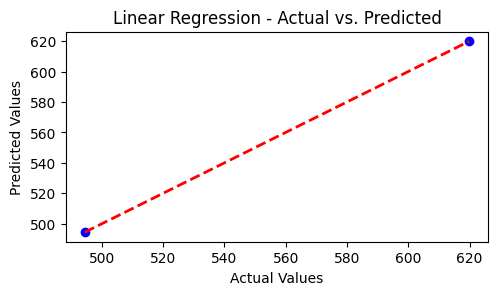

In [74]:
import matplotlib.pyplot as plt

# Plotting actual vs. predicted values for Linear Regression
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred_linear, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Linear Regression - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

As can be seen from this model the model which gives the best solution is Linear Regression